| **Inicio** | **atrás 8** |
|----------- |-------------- |
| [🏠](../README.md) | [⏪](./8_Analisis_de_Varianza_(ANOVA).ipynb)|

# **9. Métodos Estadísticos Avanzados**

## **Análisis de Componentes Principales (PCA)**

### **Reducción de dimensionalidad**

La reducción de dimensionalidad, y en particular el Análisis de Componentes Principales (PCA), es una técnica utilizada para reducir la cantidad de variables en un conjunto de datos, manteniendo la mayor parte de la información original. PCA transforma las variables originales en un nuevo conjunto de variables (llamadas componentes principales) que son combinaciones lineales de las variables originales.

**Fórmula y Conceptos Básicos:**

Dada una matriz de datos $(X)$ de dimensiones $(n \times p)$ (donde $(n)$ es el número de observaciones y $(p)$ es el número de variables), PCA encuentra $(p)$ combinaciones lineales de las variables originales, llamadas componentes principales $(PC)$. Estos componentes principales son ortogonales entre sí y están ordenados por la cantidad de varianza que explican.

La transformación PCA se realiza de la siguiente manera:

$Z = X \cdot V$

Donde:

- $(Z)$ es la matriz de datos transformada.
- $(X)$ es la matriz original centrada.
- $(V)$ es la matriz de vectores propios (eigenvectors) de la matriz de covarianza de $(X)$.

**Ejemplo con Código Python:**

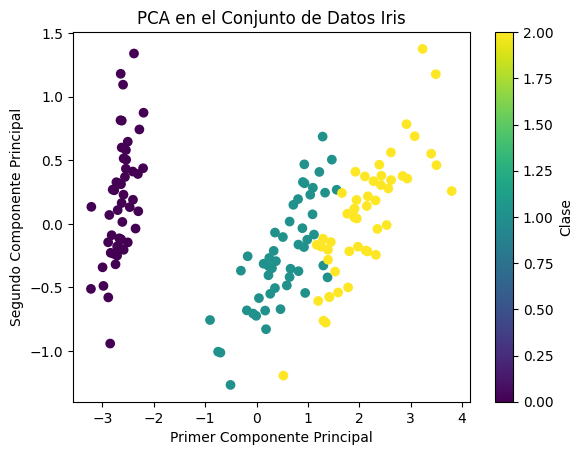

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización en gráfico
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('PCA en el Conjunto de Datos Iris')
plt.colorbar(label='Clase')
plt.show()

En este ejemplo, hemos aplicado PCA al conjunto de datos Iris y visualizado las dos primeras componentes principales. La información se ha reducido de 4 dimensiones (variables originales) a 2 dimensiones (componentes principales).

**Interpretación de Resultados:**

- **Componentes Principales:**

  - Cada componente principal es una combinación lineal de las variables originales.
  - Los componentes están ordenados por la cantidad de varianza que explican. El primer componente explica la mayor cantidad de varianza, el segundo componente explica la siguiente mayor cantidad, y así sucesivamente.

- **Varianza Explicada:**

  - La varianza explicada por cada componente principal se puede obtener de los valores propios de la matriz de covarianza.

**Visualización de Varianza Explicada:**

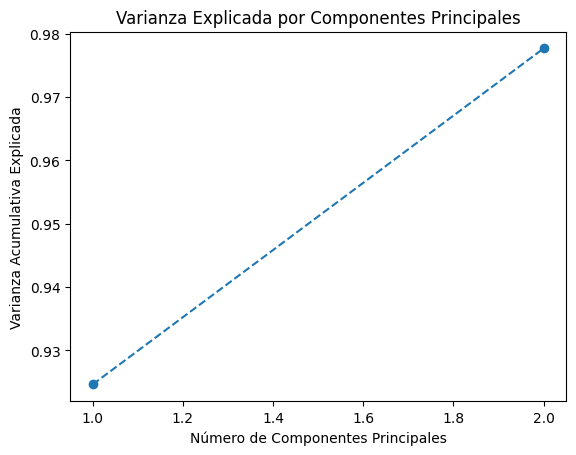

In [2]:
# Visualización de la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

Este gráfico muestra cómo la varianza explicada acumulativa aumenta a medida que consideramos más componentes principales. Puede ayudar a decidir cuántos componentes principales retener.

**Nota:**

La elección del número de componentes principales a retener puede depender de varios factores, como la cantidad de varianza que se desea mantener o la interpretación de los resultados en el contexto del problema. Es importante tener en cuenta que la reducción de dimensionalidad implica pérdida de información, y la cantidad de información retenida dependerá del número de componentes principales seleccionados.

### **Interpretación de componentes principales**

La interpretación de componentes principales es crucial para entender cómo las variables originales contribuyen a las nuevas dimensiones creadas por PCA. Cada componente principal es una combinación lineal de las variables originales, y su interpretación puede proporcionar información sobre patrones o estructuras en los datos.

**Fórmula y Conceptos Básicos:**

Dada una matriz de datos $(X)$ de dimensiones $(n \times p)$ (donde $(n)$ es el número de observaciones y $(p)$ es el número de variables), la transformación PCA se realiza como:

$Z = X \cdot V$

Donde:

- $(Z)$ es la matriz de datos transformada.
- $(X)$ es la matriz original centrada.
- $(V)$ es la matriz de vectores propios (eigenvectors) de la matriz de covarianza de $(X)$.

Cada columna de $(V)$ representa un vector propio que define una dirección en el espacio original de las variables. La magnitud de cada vector propio indica la importancia de esa dirección.

**Ejemplo con Código Python:**

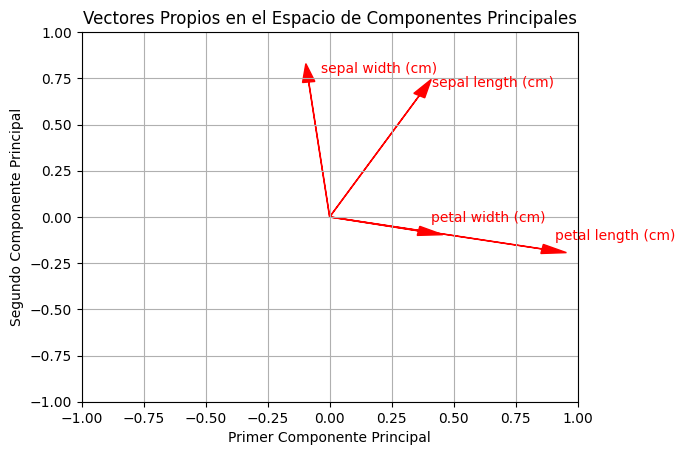

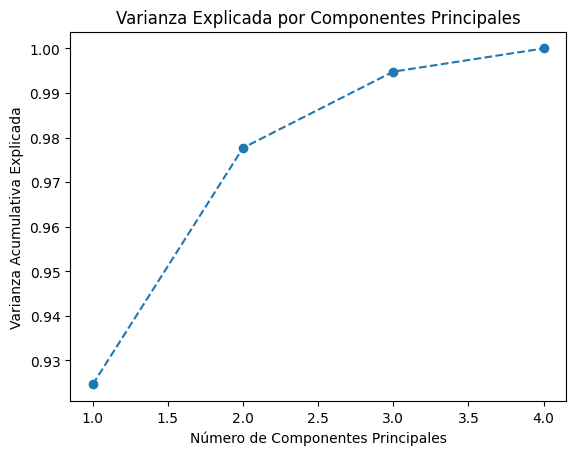

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
variables = iris.feature_names

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Obtener vectores propios y varianza explicada
eigenvectors = pca.components_.T
explained_variance_ratio = pca.explained_variance_ratio_

# Visualización de vectores propios
fig, ax = plt.subplots()
for i, var in enumerate(variables):
    ax.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.text(eigenvectors[i, 0] + 0.05, eigenvectors[i, 1] + 0.05, var, color='r')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Vectores Propios en el Espacio de Componentes Principales')
plt.grid()
plt.show()

# Visualización de la varianza explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

En este ejemplo, hemos aplicado PCA al conjunto de datos Iris y visualizado los vectores propios en el espacio de las dos primeras componentes principales. También hemos mostrado la varianza explicada acumulativa.

**Interpretación de Resultados:**

- **Vectores Propios:**

  - Cada vector propio representa una dirección en el espacio original de las variables.
  - La magnitud del vector propio indica la importancia de esa dirección en términos de varianza explicada.

- **Varianza Explicada:**

  - La varianza explicada por cada componente principal se puede obtener de los valores propios de la matriz de covarianza.

**Visualización de Cargas Factoriales:**

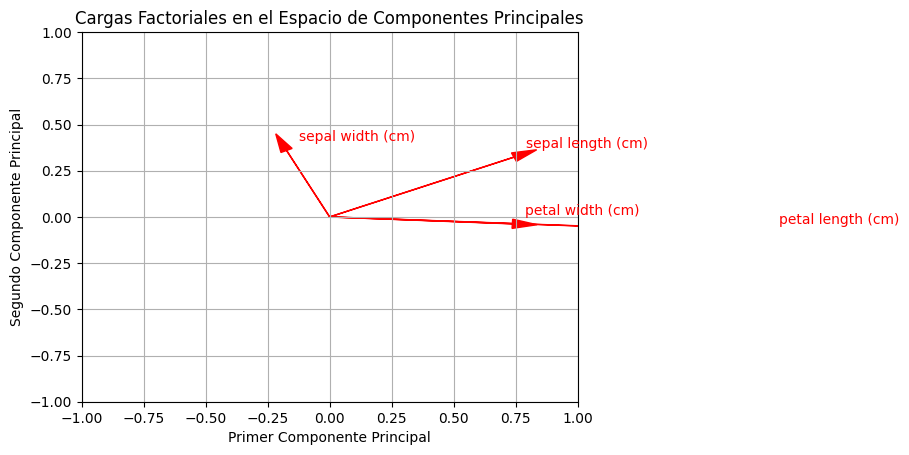

In [4]:
# Visualización de cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
for i, var in enumerate(variables):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.text(loadings[i, 0] + 0.05, loadings[i, 1] + 0.05, var, color='r')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_title('Cargas Factoriales en el Espacio de Componentes Principales')
plt.grid()
plt.show()


Este gráfico muestra las cargas factoriales, que son las proyecciones de las variables originales en el espacio de componentes principales. Las cargas factoriales indican la contribución de cada variable a cada componente principal.

La interpretación de componentes principales puede ser valiosa para entender la estructura subyacente de los datos y seleccionar las dimensiones más importantes en un conjunto de datos de alta dimensionalidad.

## **Análisis de Clúster**

### **Métodos de agrupamiento**

El análisis de clúster es una técnica que busca agrupar datos similares en conjuntos llamados clústeres. Hay varios métodos de agrupamiento, y algunos de los más comunes incluyen el K-Means, la Agrupación Jerárquica y el DBSCAN. A continuación, te proporcionaré una explicación detallada de estos métodos junto con ejemplos y gráficos en Python.

**1. K-Means:**

**Explicación:**

K-Means es un algoritmo iterativo que asigna puntos de datos a $(k)$ clústeres basándose en la distancia euclidiana. El objetivo es minimizar la varianza intra-cluster.

**Ejemplo en Python:**

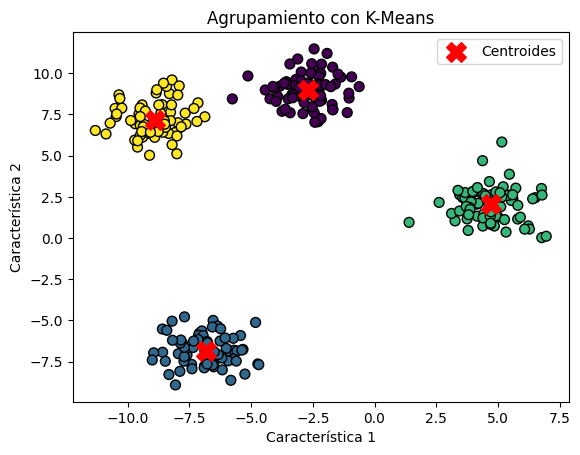

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Agrupamiento con K-Means')
plt.legend()
plt.show()

**2. Agrupación Jerárquica:**

**Explicación:**

La Agrupación Jerárquica construye una jerarquía de clústeres. Puede ser aglomerativo (comienza con cada punto como un clúster y fusiona los más cercanos) o divisivo (comienza con un único clúster y divide hasta obtener clústeres individuales).

**Ejemplo en Python:**

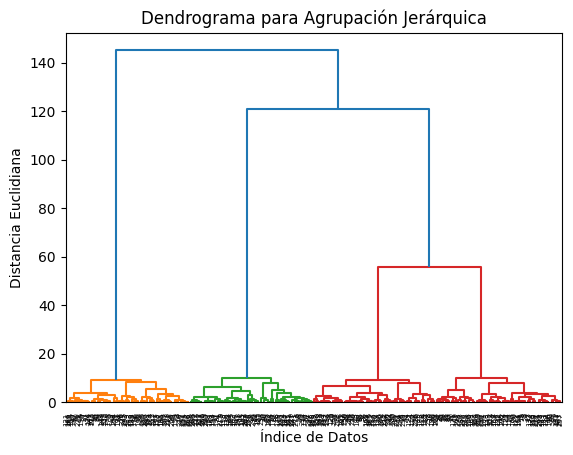

In [7]:
import scipy.cluster.hierarchy as sch

# Calcular enlaces jerárquicos
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Visualización del dendrograma
plt.title('Dendrograma para Agrupación Jerárquica')
plt.xlabel('Índice de Datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

**3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

**Explicación:**

DBSCAN agrupa puntos en función de su densidad. Puntos densos se consideran núcleos y se agrupan, mientras que puntos aislados se consideran ruido.

**Ejemplo en Python:**

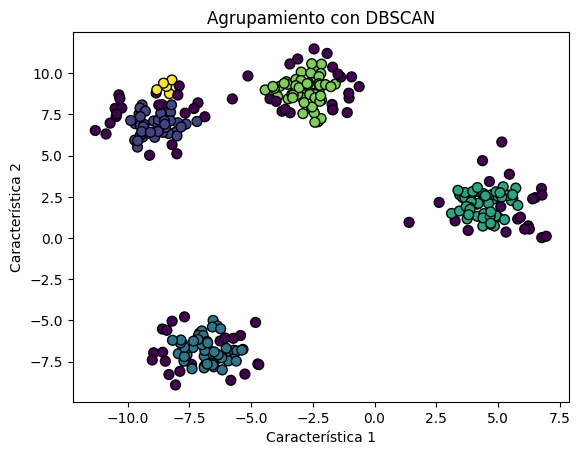

In [8]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', edgecolors='k', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Agrupamiento con DBSCAN')
plt.show()

Estos son solo ejemplos básicos. La elección del método de agrupamiento dependerá del tipo de datos y de los patrones que estés buscando en tus datos. La visualización, como se ha hecho aquí, es crucial para entender los resultados del agrupamiento.

### **Interpretación de resultados**

La interpretación de los resultados en análisis de clúster puede variar según el método específico que hayas utilizado. Aquí, te proporcionaré pautas generales para interpretar los resultados de tres métodos comunes: K-Means, Agrupación Jerárquica y DBSCAN.

**1. K-Means:**

- **Centroides:**

  - Cada clúster en K-Means tiene un centroide, que es el promedio de todos los puntos en ese clúster.
  - Puedes interpretar los centroides como representativos del "centro" de cada grupo.

- **Varianza Intra-Cluster:**

  - El objetivo de K-Means es minimizar la varianza intra-cluster, lo que significa que los puntos dentro de un clúster deberían ser similares entre sí.

- **Número de Clústeres:**

  - Puedes interpretar gráficos como el "codo" para ayudar a elegir el número óptimo de clústeres.

**2. Agrupación Jerárquica:**

- **Dendrograma:**

  - En la agrupación jerárquica, puedes interpretar el dendrograma para comprender cómo los clústeres se fusionan o dividen.
  - Las uniones tempranas en el dendrograma indican clústeres más similares.

- **Altura del Dendrograma:**

  - La altura en la que dos clústeres se fusionan en el dendrograma puede sugerir la similitud entre esos clústeres.

**3. DBSCAN:**

- **Núcleos y Ruido:**

  - DBSCAN identifica núcleos, puntos densos, y puntos ruido.
  - Puedes interpretar los núcleos como áreas densas de puntos y los puntos ruido como atípicos.

- **Número de Clústeres:**

  - DBSCAN no requiere especificar el número de clústeres de antemano.
  - Puedes ajustar los parámetros `eps` y `min_samples` para controlar la densidad requerida para formar un clúster.

**Consejos Generales:**

- **Visualización:**

  - La visualización de los datos y los resultados del clústering es esencial.
  - Gráficos de dispersión, dendrogramas, y otros métodos visuales pueden ayudar a interpretar y validar los resultados.

- **Validación de Clústeres:**

  - Utiliza medidas de validación, como el índice de silueta, para evaluar la calidad de los clústeres.
  - Un índice de silueta cercano a 1 indica una buena separación entre clústeres.

- **Contexto del Dominio:**

  - Comprende el contexto del dominio y cómo los clústeres se relacionan con el problema en cuestión.

Recuerda que la interpretación de resultados puede ser subjetiva y depende del conocimiento del dominio y de los objetivos específicos del análisis. La combinación de técnicas visuales y métricas de validación puede proporcionar una comprensión más completa de los resultados del análisis de clúster.

| **Inicio** | **atrás 8** |
|----------- |-------------- |
| [🏠](../README.md) | [⏪](./8_Analisis_de_Varianza_(ANOVA).ipynb)|